In [34]:
def linspace(initial, final, interval):
		n = int((final - initial) / interval)
		return [initial + i*interval for i in range(n)]

## Numerical Differentiation

In [10]:
def forward_difference(f, x, h):
  return (f[x + h] - f[x]) / h

def backward_difference(f, x, h):
  return (f[x] - f[x - h]) / h

def central_difference(f, x, h):
  return (f[x + h] - f[x - h]) / (2 * h)

def richardson_extrapolation(f, x, h):
  return (4 * central_difference(f, x, h) - central_difference(f, x, 2*h))/3

def two_point_forward_difference(f, x, h):
  return (-3*f[x] + 4*f[x + h] - f[x + 2*h])/(2*h)

def two_point_backward_difference(f, x, h):
  return (f[x - 2*h] - 4*f[x - h] + 3*f[x])/(2*h)


In [13]:
data = {
  0.0: 12000,
  0.2: 11980,
  0.4: 11959,
  0.6: 11936,
  0.8: 11910,
  1.0: 11885,
  1.2: 11857,
  1.4: 11828,
  1.6: 11800,
  1.8: 11769,
  2.0: 11740,
  2.2: 11710,
  2.4: 11679
}

speed_t12 = forward_difference(data, 1.2, 0.4)
speed_t12

speed_t12 = forward_difference(data, 1.2, 0.2)
speed_t12


-145.0

## Regression

In [24]:
def linear_regression(x, y):
	n = len(y)
	x_mean = sum(x)/n
	y_mean = sum(y)/n

	sum_xi_yi = sum(x[i] * y[i] for i in range(n))
	sum_xi_square = sum(x[i] ** 2 for i in range(n))

	w = (sum_xi_yi - n * x_mean * y_mean) / ( sum_xi_square - n*(x_mean**2) )
	b = y_mean - w * x_mean
	return w, b

data = {
	1500: 245,
	1600: 265,
	1700: 275,
	1800: 295,
	2000: 325
}

w, b = linear_regression(list(data.keys()), list(data.values()))

print(f"The line is y = {w}x + {b}")

The line is y = 0.1581081081081081x + 9.054054054054063


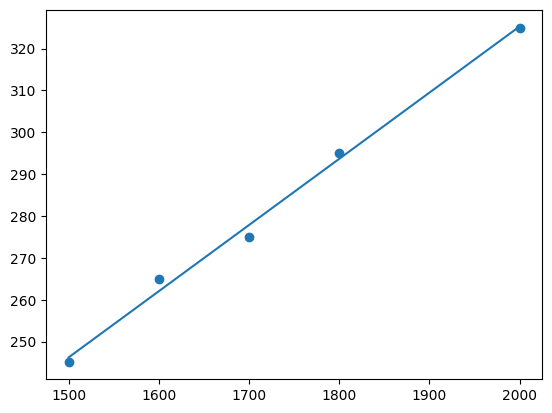

In [25]:
import matplotlib.pyplot as plt

plt.scatter(list(data.keys()), list(data.values()))
plt.plot(list(data.keys()), [w*x + b for x in list(data.keys())])

## Power Fit

In [31]:
def power_fit(x, y, m):
	n = len(y)
	num = sum(y[i] * x[i]**m for i in range(n))
	deno = sum(x[i]**(2*m) for i in range(n))
	return num/deno

data = {
	1: 120,
	2: 300,
	3: 550,
	4: 900,
	5: 1400
}

m = 2
a = power_fit(list(data.keys()), list(data.values()), m)

print(f"The curve is y = {a}x^{m}")

The curve is y = 56.86414708886619x^2


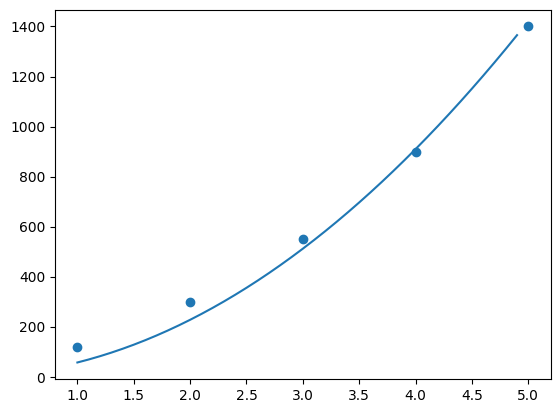

In [33]:
plt.scatter(list(data.keys()), list(data.values()))
plt.plot([x for x in linspace(1, 5, 0.1)], [a*x**m for x in linspace(1, 5, 0.1)])
plt.show()

## Lagrange Interpolation

In [37]:
from math import prod

def l(x, f, xk, i):
	n = len(f)
	return prod((xk - x[j]) / (x[i] - x[j]) for j in range(n) if j != i)

def lagrange_interpolation(data, xk):
	x = list(data.keys())
	f = list(data.values())
	n = len(f)
	return sum(f[i] * l(x, f, xk, i) for i in range(n))

In [39]:
data = {
  1: 150.56000000,
  2: 152.78000000,
  3: 155.23000000,
  4: 158.67000000,
  5: 162.78000000,
  6: 167.23000000,
  7: 172.67000000,
  8: 179.78000000,
  9: 188.23000000,
  10: 198.67000000
}

print(lagrange_interpolation(data, 11))

219.69999999999703


### Equation Solving - Iterative Methods

In [64]:
def jacobi_iteration(A, B, iter=100):
	n = len(A)
	X = [0] * n

	for _ in range(iter):
		X_updated = X.copy()
		for i in range(n):
			s = sum(A[i][j]*X[j] for j in range(n) if j!=i)
			X_updated[i] = (B[i] - s)/A[i][i]
		X = X_updated

	return X

def gauss_seidel(A, B, iter=100):
	n = len(A)
	X = [0] * n

	for _ in range(iter):
		for i in range(n):
			s = sum(A[i][j]*X[j] for j in range(n) if j!=i)
			X[i] = (B[i] - s)/A[i][i]

	return X

def SOR(A, B, iter=100, r=1.2):
	n = len(A)
	X = [0] * n

	for _ in range(iter):
		for i in range(n):
			s = sum(A[i][j]*X[j] for j in range(n) if j!=i)
			X[i] = (1 - r) * X[i] + r * (B[i] - s)/A[i][i]

	return X


In [65]:
A = [[8, 3, -2],
	 [2, 10, 5],
	 [-3, 6, 15]]

B = [130, 250, 190]

X1 = jacobi_iteration(A, B, 10)
X2 = gauss_seidel(A, B, 10)
X3 = SOR(A, B, 10, 1.2)

print(X1)
print(X2)
print(X3)

[10.818156748046874, 19.255133470052083, 7.132283045572916]
[10.795793675551858, 19.28509410790543, 7.111787758614867]
[10.795962461074401, 19.284656695111696, 7.111962185273782]


In [90]:
from math import prod

def p(x, x_k, i):
	return prod(x_k - x[j] for j in range(i))

def divided_difference_table(X):
	n = len(X)
	D = [[0] * n for _ in range(n)]

	for i in range(n):
		D[i][0] = X[i]

	for j in range(1, n):
		for i in range(n-j):
			D[i][j] = (D[i+1][j-1] - D[i][j-1]) / (X[i+j] - X[i])

	return [D[i][0] for i in range(n)]


def divided_difference(data, x_k):
	x = list(data.keys())
	y = list(data.values())
	n = len(y)

	divided_differences = divided_difference_table(x)

	# print(divided_differences)

	return sum(divided_differences[i] * p(x, x_k, i) for i in range(n))


In [3]:
data = {
  10: 12.34000000,
  20: 18.78000000,
  30: 25.56000000,
  40: 30.23000000,
  60: 34.56000000,
  70: 33.78000000,
  80: 29.45000000,
  90: 22.78000000,
  100: 15.23000000
}

x_k = 50

print(divided_difference(data, x_k))


33.04198412698414


In [4]:
from math import prod

def divided_difference_table(x, y):
    n = len(x)

    table = [ [0]*n for _ in range(n) ]

    for i in range(n):
        table[i][0] = y[i]

    for j in range(1, n):
        for i in range(n - j):
            table[i][j] = (table[i+1][j-1] - table[i][j-1]) / (x[i+j] - x[i])

    return [table[0][i] for i in range(n)]

def p(x, x_k, i):
    return prod(x_k - x[j] for j in range(i))

def divided_difference(data, x_k):
    x = list(data.keys())
    y = list(data.values())
    n = len(x)

    coeffs = divided_difference_table(x, y)

    return sum(coeffs[i] * p(x, x_k, i) for i in range(n))

In [5]:
print(divided_difference(data, x_k))

33.04198412698414


In [100]:
from math import comb, factorial

def binomial_coeff(s, k):
    result = 1
    for i in range(k):
        result *= (s - i)
    return result / factorial(k)

def forward_difference_table(f):
  n = len(f)
  F = [[0] * n for _ in range(n)]

  for i in range(n):
    F[i][0] = f[i]

  for j in range(1, n):
    for i in range(n-j):
      F[i][j] = F[i+1][j-1] - F[i][j-1]

  return [F[0][i] for i in range(n)]

def forward_interpolation(data, x_k):
  x = list(data.keys())
  y = list(data.values())
  n = len(x)

  h = x[1] - x[0]

  s = (x_k - x[0]) / h

  forward_diff_table = forward_difference_table(y)

  return sum(binomial_coeff(s, j) * forward_diff_table[j] for j in range(n))

In [101]:
data = {
  6: 15.0,
  7: 15.9,
  8: 17.1,
  9: 18.2,
  10: 20.5,
  11: 21.8,
  12: 23.0,
  13: 24.1,
  14: 25.2,
  15: 25.9,
}

print(forward_interpolation(data, 8.5))


17.34514465332031
